In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df=pd.read_csv('Travel.csv')

In [8]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [10]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [13]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [14]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [15]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [16]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [17]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [18]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),' %missing values')

Age 4.62357  %missing values
TypeofContact 0.51146  %missing values
DurationOfPitch 5.13502  %missing values
NumberOfFollowups 0.92062  %missing values
PreferredPropertyStar 0.53191  %missing values
NumberOfTrips 2.86416  %missing values
NumberOfChildrenVisiting 1.35025  %missing values
MonthlyIncome 4.76678  %missing values


In [19]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [20]:
# impute median value for age column 
# impute mode for type of contract
#impute median for duration of pitch 
#impute mode for numberof followups as it is discreate feature
# impute mode for preffered property star
# impute median for numberoftrips
# impute mode for numeber of children visiting
# impute median for monthly income 

In [21]:
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [22]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [23]:
df.drop('CustomerID',inplace=True,axis=1)

In [24]:
print(df.columns)


Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


In [25]:
df['TotalPeopleVisiting'] = (
    df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
)

df.drop(
    ['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'],
    axis=1,
    inplace=True
)


In [26]:
num_features = [features for features in df.columns if df[features].dtype != 'O']
print('Num of Numerical Features :',len(num_features))

Num of Numerical Features : 12


In [27]:
cat_features = [features for features in df.columns if df[features].dtype == 'O']
print('Num of Numerical Features :',len(cat_features))

Num of Numerical Features : 6


In [28]:
discreate_features = [
    feature for feature in num_features 
    if len(df[feature].unique()) <= 25
]

print('Num of discrete features:', len(discreate_features))


Num of discrete features: 9


In [29]:
print(num_features)
print(discreate_features)


['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalPeopleVisiting']
['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalPeopleVisiting']


In [30]:
continuous_features = [feature for feature in num_features if feature not in discreate_features]
print('number of continous features :',len(continuous_features))

number of continous features : 3


In [31]:
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [33]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = StandardScaler()
Oh_transformer = OneHotEncoder(drop='first')
preporcessor = ColumnTransformer(
    [
        ("OneHotEncoder",Oh_transformer,cat_features),
        ("StandardScaler",numeric_features,num_features)
    ]
)

In [34]:
X_train= preporcessor.fit_transform(X_train)
X_test = preporcessor.transform(X_test)

In [44]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.4/72.0 MB 13.4 MB/s eta 0:00:06
   -- ------------------------------------- 4.2/72.0 MB 10.9 MB/s eta 0:00:07
   --- ------------------------------------ 6.3/72.0 MB 10.4 MB/s eta 0:00:07
   ---- ----------------------------------- 8.7/72.0 MB 10.5 MB/s eta 0:00:07
   ------ --------------------------------- 11.0/72.0 MB 10.7 MB/s eta 0:00:06
   ------- -------------------------------- 13.9/72.0 MB 11.2 MB/s eta 0:00:06
   -------- ------------------------------- 15.7/72.0 MB 10.9 MB/s eta 0:00:06
   --------- ------------------------------ 17.8/72.0 MB 10.7 MB/s eta 0:00:06
   ---------- ----------------------------- 19.7/72.0 MB 10.6 MB/s eta 0:00:05
   ----------- ---------------------------- 21.2/72.0 MB 10.1 MB/s eta 0:00:06
   ------------ --------------------------- 22.5/72.0 MB 9.8 MB/s eta 0:00:06
   ------------- -------------------------- 24.6/72.0 MB 9.8 MB/s 


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay , precision_score , recall_score , f1_score , roc_auc_score , roc_curve

In [46]:
models = {
    "Random Forest": RandomForestClassifier(),
    "DecisionTree":  DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model Perfrom for Training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1 Score : {:.4f}".format(model_train_f1))
    print("- Roc Auc Score : {:.4f}".format(model_train_rocauc_score))
    print("- Recall Score : {:.4f}".format(model_train_recall))

    print("---------------------------------------------------------")

    print('model performance for test set')
    print("- Accuracy : {:.4f}".format(model_test_accuracy))
    print("- F1 Score : {:.4f}".format(model_test_f1))
    print("- Roc Auc Score : {:.4f}".format(model_test_rocauc_score))
    print("- recall score : {:.4f}".format(model_test_recall))
    
    print("----------------------------------------------------------")

Random Forest
Model Perfrom for Training set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Roc Auc Score : 1.0000
- Recall Score : 1.0000
---------------------------------------------------------
model performance for test set
- Accuracy : 0.9315
- F1 Score : 0.7938
- Roc Auc Score : 0.8345
- recall score : 0.6754
----------------------------------------------------------
DecisionTree
Model Perfrom for Training set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Roc Auc Score : 1.0000
- Recall Score : 1.0000
---------------------------------------------------------
model performance for test set
- Accuracy : 0.9274
- F1 Score : 0.8097
- Roc Auc Score : 0.8756
- recall score : 0.7906
----------------------------------------------------------
Logistic Regression
Model Perfrom for Training set
- Accuracy : 0.8460
- F1 Score : 0.8202
- Roc Auc Score : 0.6368
- Recall Score : 0.3032
---------------------------------------------------------
model performance for test set
- Accuracy : 0.8364
- F1 Score

In [48]:
XGBoost_params={
    "learning_rate":[0.1,0.01],
    "colsample_bytree":[0.5,0.8,1,0.3,0,4],
    "n_estimators":[100,200,500,1000],
    "max_depth":[5,8,15,20,10,30]
}

In [49]:
XGBoost_params

{'learning_rate': [0.1, 0.01],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0, 4],
 'n_estimators': [100, 200, 500, 1000],
 'max_depth': [5, 8, 15, 20, 10, 30]}

In [50]:
randomcv_models = [
    ("XG",XGBClassifier(),XGBoost_params)
]

In [51]:
randomcv_models

[('XG',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  {'learning_rate': [0.1, 0.01],
   'colsample_bytree': [0.5, 0.8, 1, 0.3, 0, 4],
   'n_estimators': [100, 200, 500, 1000],
   'max_depth': [5, 8, 15, 20, 10, 30]})]

In [52]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name , model , params in randomcv_models:
    random =  RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3, verbose=2 , n_jobs=-1)
    random.fit(X_train,y_train)
    model_params[name]=random.best_params_
for models_name in model_params:
    print(f"best params for {models_name}")
    print(model_params[models_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best params for XG
{'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [53]:
models = {
    "XGBoost":XGBClassifier(n_estimators=200,max_depth=20,learning_rate=0.1,colsample_bytree=0.8)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model Perfrom for Training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1 Score : {:.4f}".format(model_train_f1))
    print("- Roc Auc Score : {:.4f}".format(model_train_rocauc_score))
    print("- Recall Score : {:.4f}".format(model_train_recall))

    print("---------------------------------------------------------")

    print('model performance for test set')
    print("- Accuracy : {:.4f}".format(model_test_accuracy))
    print("- F1 Score : {:.4f}".format(model_test_f1))
    print("- Roc Auc Score : {:.4f}".format(model_test_rocauc_score))
    print("- recall score : {:.4f}".format(model_test_recall))
    
    print("----------------------------------------------------------")

XGBoost
Model Perfrom for Training set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Roc Auc Score : 1.0000
- Recall Score : 1.0000
---------------------------------------------------------
model performance for test set
- Accuracy : 0.9581
- F1 Score : 0.8825
- Roc Auc Score : 0.9006
- recall score : 0.8063
----------------------------------------------------------


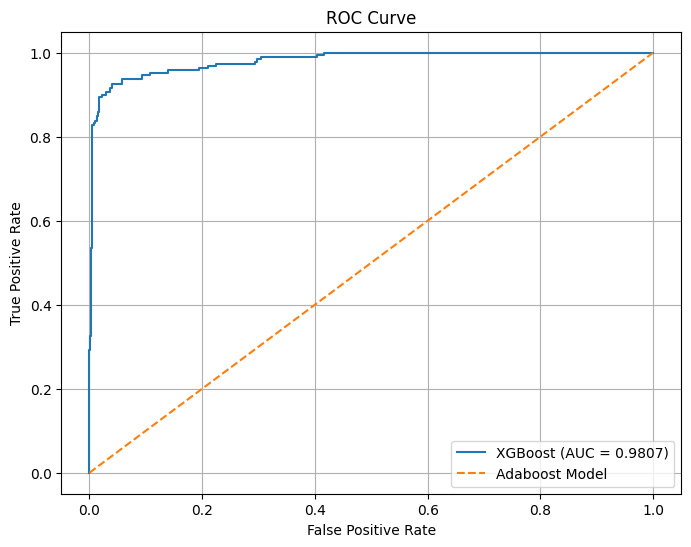

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

auc_models = [
    {
        'label': 'XGBoost',
        'model': XGBClassifier(n_estimators=200,max_depth=20,learning_rate=0.1,colsample_bytree=0.8)
    }
]

for algo in auc_models:
    model = algo['model']
    label = algo['label']
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # AUC score
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.4f})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', label='Adaboost Model')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
